In this example we simulate ambiguous resonances in multipulse quantum sensing with nitrogen vacancy (NV) centers in diamonds. This notebook closely follows the work from "Ambiguous Resonances in Multipulse Quantum Sensing with Nitrogen Vacancy Centers" available at https://doi.org/10.1103/PhysRevA.111.022606 . 

As this is a quite complex problem, physics discussions will be kept to a minimum here in favor of a focus to the simulation. For a detailed explanation of the problem, please refer to the original paper.

In [ ]:
import numpy as np
from qutip import tensor, jmat, qeye

from quaccatoo import NV, XY8, Analysis

# 1. Field Misalignment and $^{15}\text{N}$ Coupling

We begin simulating a XY8-2 sequence with a misaligned magnetic field, as in Sec. IV A of the paper. Initially, we define the NV system with the experimental parameters of the paper and the XY8 pulse sequence.

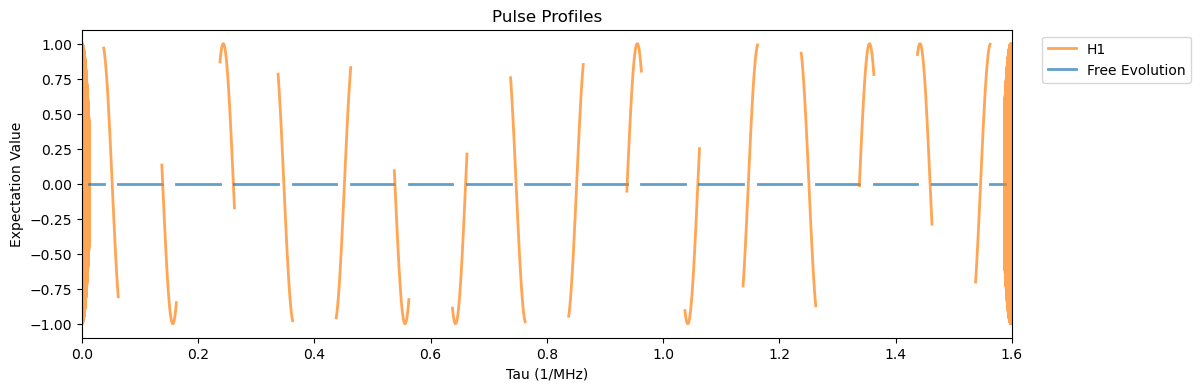

In [ ]:
qsys = NV(
    N=15,
    B0 = 39.4,
    units_B0='mT',
    theta=2.6,
    units_angles='deg'
)

w1 = 20

XY8_15N  = XY8(
    free_duration = np.linspace(.25, .36, 100),
    system = qsys,
    M=2,
    pi_pulse_duration = 1/2/w1,
    h1 = w1*qsys.MW_h1,
    # MW frequency for the ms=0 --> ms=+1 state transition
    pulse_params = {'f_pulse': qsys.MW_freqs[1]}, 
    # Number of time steps in each MW pulse
    time_steps=100,
)

XY8_15N.plot_pulses(tau=.1, figsize=(12, 4))

Here we can observe the 16 $\pi$-pulses plus the initial and final $\pi/2$ pulses. Now to run the experiment as in Fig. 3 (d):

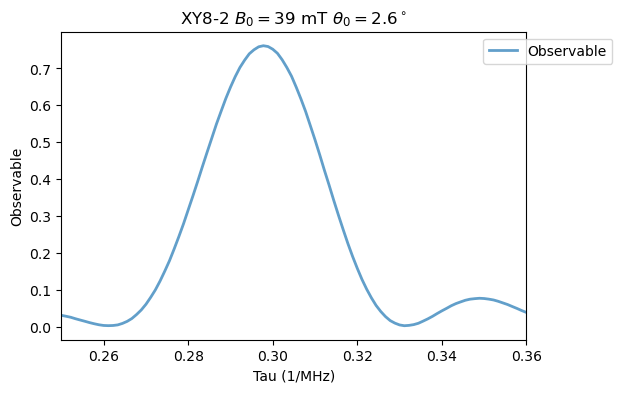

In [3]:
XY8_15N.run()
Analysis(XY8_15N).plot_results(title=r'XY8-2 $B_0=39$ mT $\theta_0=2.6^\circ$')

Increasing the XY8 order. First for $M=4$:

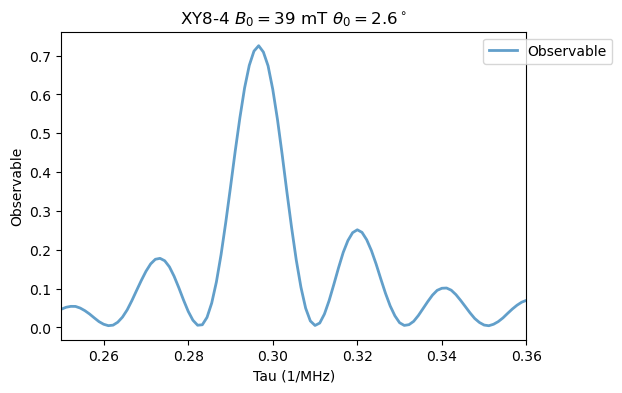

In [4]:
XY8_15N.M = 4
XY8_15N.run()
Analysis(XY8_15N).plot_results(title=r'XY8-4 $B_0=39$ mT $\theta_0=2.6^\circ$')

$M=6$:

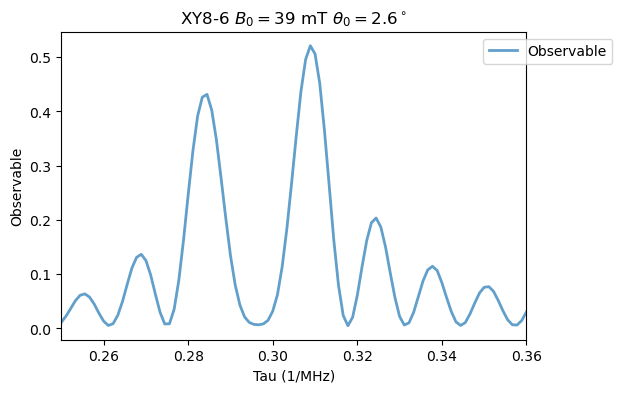

In [5]:
XY8_15N.M = 6
XY8_15N.run()
Analysis(XY8_15N).plot_results(title=r'XY8-6 $B_0=39$ mT $\theta_0=2.6^\circ$')

$M=8$:

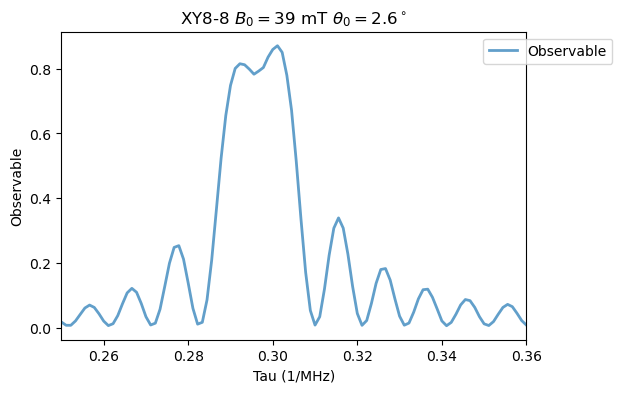

In [6]:
XY8_15N.M = 8
XY8_15N.run()
Analysis(XY8_15N).plot_results(title=r'XY8-8 $B_0=39$ mT $\theta_0=2.6^\circ$')

Now, changing the field for XY8-2 as in Fig. 3 (c). First, $B_0=33$ mT and $\theta_0 = 5.1^\circ$:

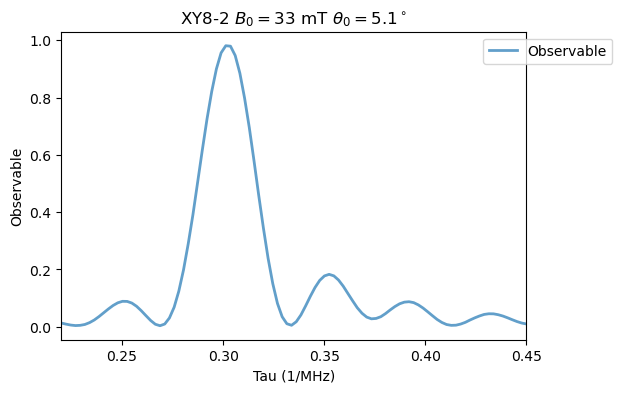

In [ ]:
qsys_2 = NV(
    N=15,
    B0 = 33,
    units_B0='mT',
    theta=5.1,
    units_angles='deg'
)

XY8_15N  = XY8(
    free_duration = np.linspace(.22, .45, 100),
    system = qsys_2,
    M=2,
    pi_pulse_duration = 1/2/w1,
    h1 = w1*qsys_2.MW_h1,
    pulse_params = {'f_pulse': qsys_2.MW_freqs[1]}
)

XY8_15N.run()
Analysis(XY8_15N).plot_results(title=r'XY8-2 $B_0=33$ mT $\theta_0=5.1^\circ$')

$B_0=26$ mT and $\theta_0 = 9.3^\circ$:

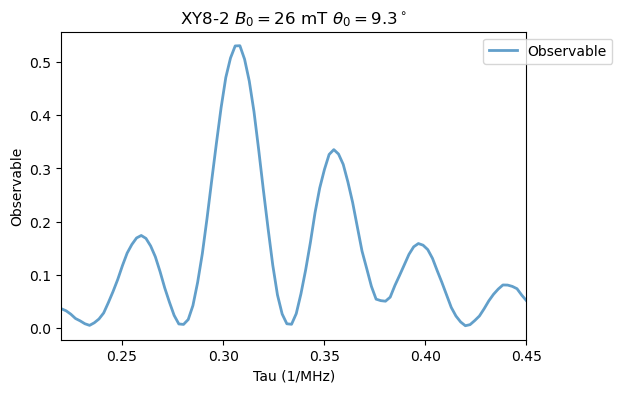

In [ ]:
qsys_3 = NV(
    N=15,
    B0 = 26, 
    units_B0='mT',
    theta = 9.3,
    units_angles='deg'
)

XY8_15N  = XY8(
    free_duration = np.linspace(.22, .45, 100),
    system = qsys_3,
    M=2,
    pi_pulse_duration = 1/2/w1,
    h1 = w1*qsys_3.MW_h1,
    pulse_params = {'f_pulse': qsys_3.MW_freqs[1]}
)

XY8_15N.run()
Analysis(XY8_15N).plot_results(title=r'XY8-2 $B_0=26$ mT $\theta_0=9.3^\circ$')

$B_0=17$ mT and $\theta_0 = 17^\circ$:

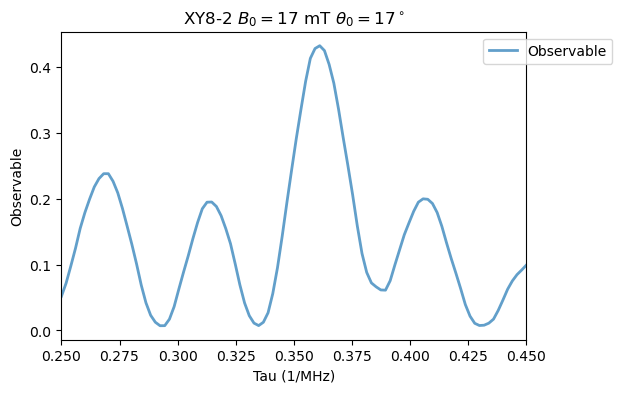

In [ ]:
qsys = NV(
    N=15, 
    B0 = 17, 
    units_B0='mT',
    theta=17,
    units_angles='deg'
)

XY8_15N  = XY8(
    free_duration = np.linspace(.25, .45, 100),
    system = qsys,
    M=2,
    pi_pulse_duration = 1/2/w1,
    h1 = w1*qsys.MW_h1,
    pulse_params = {'f_pulse': qsys.MW_freqs[1]}
)

XY8_15N.run()
Analysis(XY8_15N).plot_results(title=r'XY8-2 $B_0=17$ mT $\theta_0=17^\circ$')

If we now include a pulse length error, as in Fig. 6, we have:

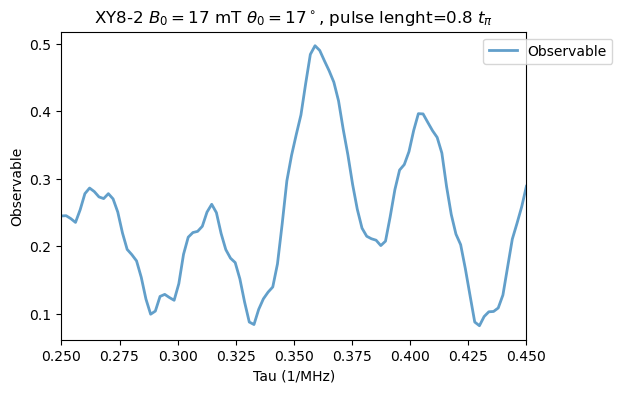

In [ ]:
XY8_15N  = XY8(
    free_duration = np.linspace(.25, .45, 100), 
    system = qsys,
    M=2,
    pi_pulse_duration = 1/2/w1*.8,
    h1 = w1*qsys.MW_h1,
    pulse_params = {'f_pulse': qsys.MW_freqs[1]}
)

XY8_15N.run()
Analysis(XY8_15N).plot_results(title=r'XY8-2 $B_0=17$ mT $\theta_0=17^\circ$, pulse lenght=0.8 $t_{\pi}$')

# 2. 13C Coupling

As in Sec. IV B, we need to define the coupling Hamiltonian $\hat{H}_2$ in the same way as Eq. 3 of the paper. We begin defining the coupling tensor shown in Appendix D and the Zeeman Hamiltonian. 

In [ ]:
A = np.empty((3, 3), dtype=object)
A[0, 0] = -0.25
A[0, 1] = -1.85
A[0, 2] = -.49
A[1, 0] = A[0, 1]
A[1, 1] = 0
A[1, 2] = .01
A[2, 0] = A[0, 2]
A[2, 1] = A[1, 2]
A[2, 2] = 1.01

HhfC = (
    A[0,0]*tensor(jmat(1,'x'), qeye(3), jmat(1/2,'x')) + A[0,1]*tensor(jmat(1,'x'), qeye(3), jmat(1/2,'y')) + A[0,2]*tensor(jmat(1,'x'), qeye(3), jmat(1/2,'z'))
    + A[1,0]*tensor(jmat(1,'y'), qeye(3), jmat(1/2,'x')) + A[1,1]*tensor(jmat(1,'y'), qeye(3),jmat(1/2,'y')) + A[1,2]*tensor(jmat(1,'y'), qeye(3), jmat(1/2,'z'))
    + A[2,0]*tensor(jmat(1,'z'), qeye(3),  jmat(1/2,'x')) + A[2,1]*tensor(jmat(1,'z'), qeye(3), jmat(1/2,'y')) + A[2,2]*tensor(jmat(1,'z'), qeye(3), jmat(1/2,'z'))
    )

def Hzc(B0, theta):
    return 10.705e-3*B0*tensor(qeye(3), qeye(3), np.cos(theta*np.pi/180)*jmat(1/2,'z') + np.sin(theta*np.pi/180)*jmat(1/2,'x'))

Now we define the NV Hamiltonian and use the `add_spin` method to introduce the 13C nuclear spin.

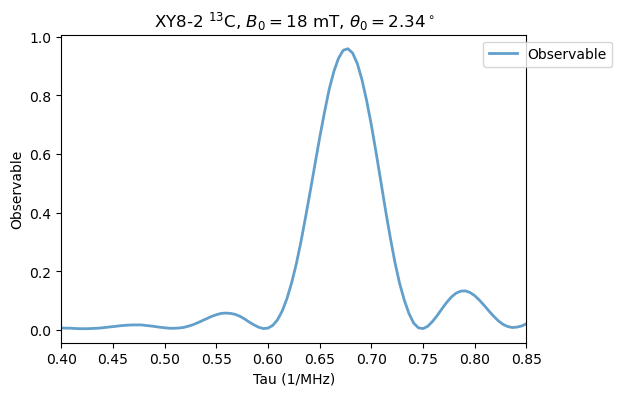

In [ ]:
qsys = NV(
    N=14,
    B0 = 18,
    units_B0='mT',
    theta=2.34,
    units_angles='deg',
)

qsys.add_spin(HhfC + Hzc(qsys.B0, qsys.theta))

XY8_13C  = XY8(
    free_duration = np.linspace(.4, .85, 100), 
    system = qsys,
    M=2,
    pi_pulse_duration = 1/2/w1,
    h1 = w1*qsys.MW_h1,
    pulse_params = {'f_pulse': qsys.MW_freqs[1]}
)

XY8_13C.run()
Analysis(XY8_13C).plot_results(title=r'XY8-2 $^{13}$C, $B_0=18$ mT, $\theta_0=2.34^\circ$')

Increasing the field as in Fig. 4 (a) for $B_0=31$ mT and $\theta_0 = 1.35^\circ$:

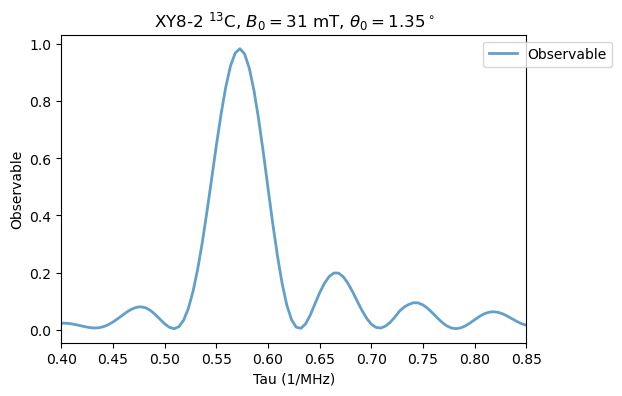

In [ ]:
qsys = NV(
    N=14,
    B0 = 31,
    units_B0='mT',
    theta=1.35,
    units_angles='deg',
)

qsys.add_spin(HhfC + Hzc(qsys.B0, qsys.theta))

XY8_13C  = XY8(
    free_duration = np.linspace(.4, .85, 100),
    system = qsys,
    M=2,
    pi_pulse_duration = 1/2/w1,
    h1 = w1*qsys.MW_h1,
    pulse_params = {'f_pulse': qsys.MW_freqs[1]}
)

XY8_13C.run()
Analysis(XY8_13C).plot_results(title=r'XY8-2 $^{13}$C, $B_0=31$ mT, $\theta_0=1.35^\circ$')

$B_0=40$ mT and $\theta_0 = 1.14^\circ$:

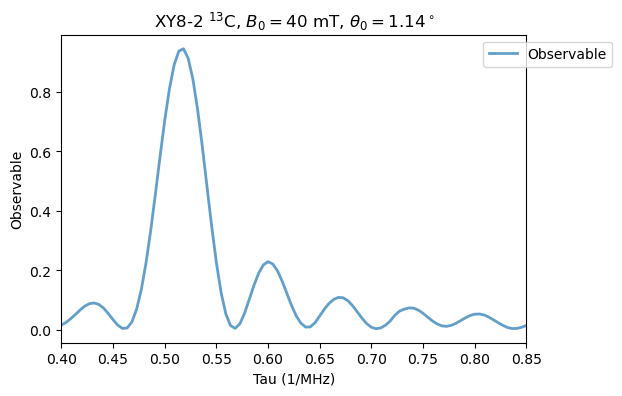

In [ ]:
qsys = NV(
    N=14,
    B0 = 40,
    units_B0='mT',
    theta=1.14,
    units_angles='deg',
)

qsys.add_spin(HhfC + Hzc(qsys.B0, qsys.theta))

XY8_13C  = XY8(
    free_duration = np.linspace(.4, .85, 100),
    system = qsys, 
    M=2,
    pi_pulse_duration = 1/2/w1,
    h1 = w1*qsys.MW_h1,
    pulse_params = {'f_pulse': qsys.MW_freqs[1]}
)

XY8_13C.run()
Analysis(XY8_13C).plot_results(title=r'XY8-2 $^{13}$C, $B_0=40$ mT, $\theta_0=1.14^\circ$')

Now, we keep the field constant and increase the order, as in Fig. 4(b). $M=4$:

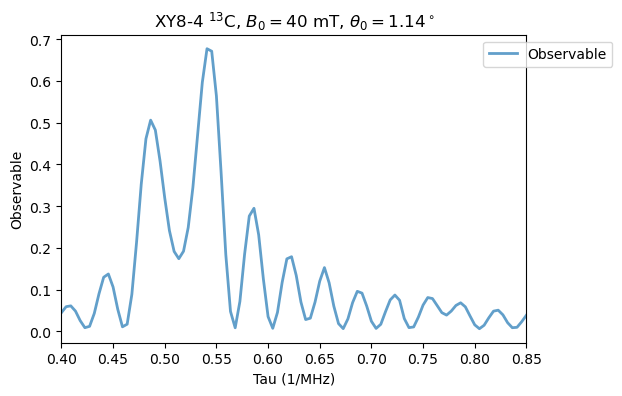

In [15]:
XY8_13C.M = 4

XY8_13C.run()
Analysis(XY8_13C).plot_results(title=r'XY8-4 $^{13}$C, $B_0=40$ mT, $\theta_0=1.14^\circ$')

$M=6$:

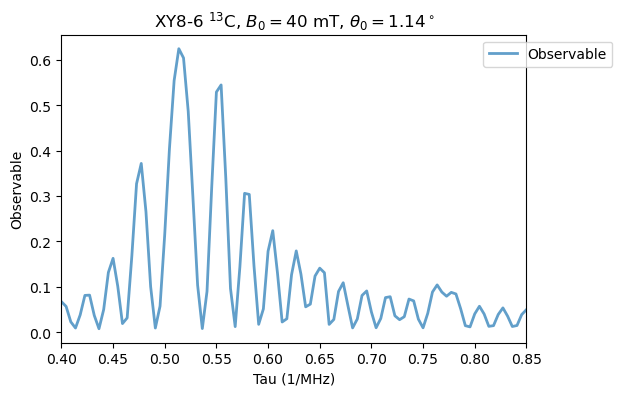

In [16]:
XY8_13C.M = 6

XY8_13C.run()
Analysis(XY8_13C).plot_results(title=r'XY8-6 $^{13}$C, $B_0=40$ mT, $\theta_0=1.14^\circ$')

$M=8$:

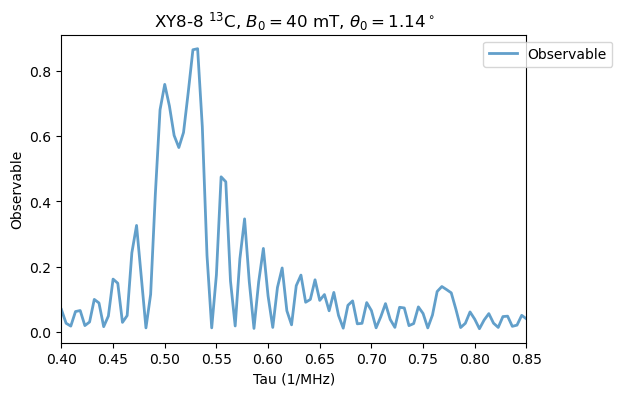

In [17]:
XY8_13C.M = 8

XY8_13C.run()
Analysis(XY8_13C).plot_results(title=r'XY8-8 $^{13}$C, $B_0=40$ mT, $\theta_0=1.14^\circ$')

# 3. RXY8 with H2

As discussed in Sec. IV C, the finite length of the pulses can lead to ambiguous resonances. Here, we define the NV Hamiltonian as usual and a time-dependent magnetic field $B_2(t)$ as in Eq. 4.

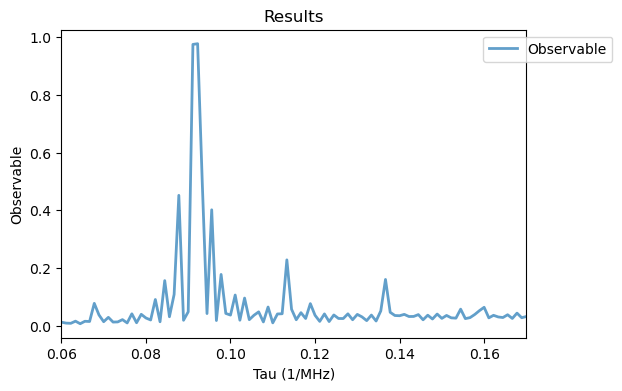

In [ ]:
qsys = NV(
    N=15,
    B0 = 40, 
    units_B0='mT'
)

w1 = 20
f2 = 5.5
B2z = 0.3

def B2(t):
    return B2z*np.sin(f2*t)

H2 = [tensor(jmat(1,'z'), qeye(2)), B2]      

XY8_12_H2  = XY8(
    free_duration = np.linspace(.06, 0.17, 100), 
    system = qsys,
    M=12,
    pi_pulse_duration = 1/2/w1,
    h1 = w1*qsys.MW_h1,
    pulse_params = {'f_pulse': qsys.MW_freqs[0]},
    H2 = H2
)

# the number of CPUs for the parallel computation can be specified with the num_cpus keyword argument
XY8_12_H2.run(map_kw = {'num_cpus': 8})
Analysis(XY8_12_H2).plot_results()

To show that these resonances are indeed from the finite pulse duration, we now simulate it with delta pulses. Notice however that the fundamental resonance is much less intense.

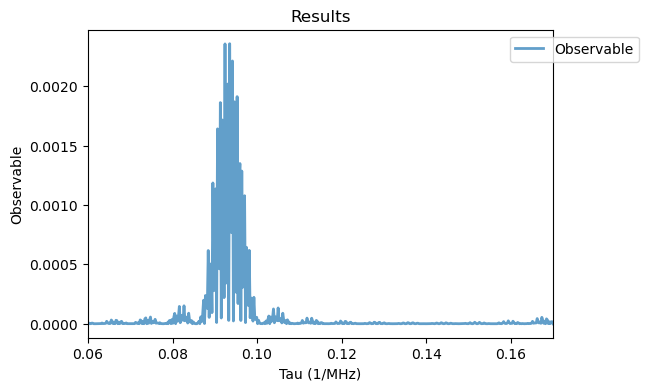

In [3]:
XY8_12_H2_delta  = XY8(
    free_duration = np.linspace(.06, 0.17, 500), 
    system = qsys,
    M=12,
    pi_pulse_duration = 0,
    Rx = qsys.MW_Rx[0],
    Ry = qsys.MW_Ry[0],
)

XY8_12_H2_delta.run(map_kw = {'num_cpus': 8})
Analysis(XY8_12_H2_delta).plot_results()

These ambiguous resonances can be supressed with phase randomization, for that we use the XY8 class with the RXY8 parameter set to True.

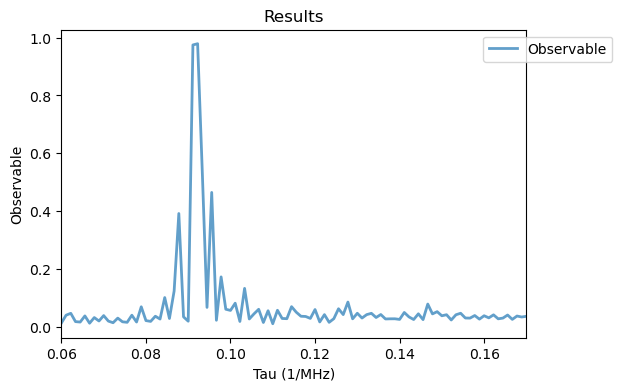

In [ ]:
RXY8_12_H2  = XY8(
    free_duration = np.linspace(.06, 0.17, 100),
    system = qsys, 
    M=12,
    pi_pulse_duration = 1/2/w1,
    h1 = w1*qsys.MW_h1, 
    pulse_params = {'f_pulse': qsys.MW_freqs[0]},
    H2 = H2,
    RXY8=True
)

RXY8_12_H2.run()
Analysis(RXY8_12_H2).plot_results()